# Identificación del color mediante clusterización

En este apartado hemos utilizado `OpenCV2` para poder manipular las imágenes, usando después el algoritmo `KMeans` de la librería `sklearn` para lograr nuestro objetivo de extraer los colores predominantes. Además necesitaremos `matplotlib.pyplot` para gráficos, `numpy` para trabajar con arrays, `rgb2lab` para pasar de valor RGB a L*a*b* y `deltaE_ciede2000` para calcular distancia entre colores. Importamos todo lo necesario en primer lugar:

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76, deltaE_ciede2000
import os

%matplotlib inline

## OpenCV

OpenCV permite leer imágenes, pero es importante saber que, por defecto, lo hace en el orden BLUE GREEN RED (BGR). Esto podría parecer que carece de importancia pero, al hacer plot de la imagen, comprobamos que los colores difieren de la original. Para que lea la imagen de la manera correcta, debemos convertir dicha imagen a RED GREEN BLUE (RGB). Se muestra un ejemplo a continuación para comprobar la diferencia.
Mostramos también el tipo, comprobando que es un array, y el shape, que nos da información del número de píxeles de alto y ancho y el tercer valor (3) nos indica que cada píxel está representado por 3 colores.

El tipo es <class 'numpy.ndarray'>
Shape: (4288, 2848, 3)


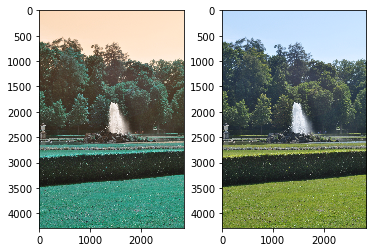

In [2]:
image = cv2.imread('DSC_0621.jpg')
print("El tipo es {}".format(type(image)))
print("Shape: {}".format(image.shape))
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#Representamos las dos imágenes
fig, axs = plt.subplots(1,2)
axs[0].imshow(image)
axs[1].imshow(image2)

## Identificación del color

En primer lugar, creamos una función que devuelve los valores `hex` de los colores a partir de sus valores RGB.

In [3]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [4]:
RGB2HEX((255,255,128))

'#ffff80'

Creamos a continuación la función que extrae los n colores mayoritarios en la imagen. Como inputs introduciremos la ruta de la imagen en cuestión, el número de colores que queremos que se identifiquen y un booleano sobre si queremos el gráfico de los colores encontrados. Modificaremos el tamaño imagen para que requiera menos tiempo extraer los colores

In [5]:
def extrae_colores(image_path, number_of_colors, show_chart):
    
    # Obtenemos la imagen usando OpenCV, convirtiéndola a RGB
    image=cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Modificamos el tamaño de la imagen para que tarde menos en extraer los colores
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    # Modificamos la imagen para que sea un array en 2D, que es lo que espera KMeans
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    #Cuenta el número de píxeles asociados a cada clúster encontrado
    counts = Counter(labels)

    # Creamos un diccionario con valor=número de píxeles de cada clúster (que realmente es cada color)
    counts = dict(sorted(counts.items()))
    
    #Obtenemos los valores RGB de los clústeres
    center_colors = clf.cluster_centers_
    
    # Ordenamos los colores usando las claves del diccionario counts
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
        
        
    return rgb_colors,counts

([array([121.05169473, 143.54539452,  55.19943326]),
  array([200.62312528, 225.8631713 , 252.51485393]),
  array([50.30646406, 62.57203481, 67.92522183]),
  array([141.90792041, 157.39641046, 161.95317987]),
  array([74.05111472, 86.91519861, 79.90848391]),
  array([140.69270684, 157.37903984,  79.80420838]),
  array([102.74377315, 117.12996551, 101.48307574]),
  array([34.76504163, 42.98446556, 40.81320427])],
 {0: 36452,
  1: 48674,
  2: 46660,
  3: 7678,
  4: 26532,
  5: 24369,
  6: 15641,
  7: 33994})

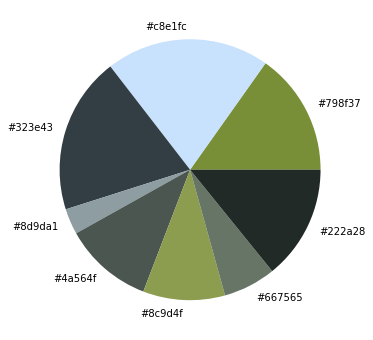

In [6]:
extrae_colores('DSC_0621.jpg', 8, True)

## Buscando el color predominante en la imagen

En primer lugar, creamos un diccionario con una base de datos de colores, siendo el valor de cada clave (color) los valores RGB correspondientes.

In [7]:
BDD_COLORES = {
'ALICEBLUE': [240,248,255],
'LAVENDER': [230,230,250],
'POWDERBLUE': [176,224,230],
'LIGHTBLUE': [173,216,230],
'LIGHTSKYBLUE': [135,206,250],
'SKYBLUE': [135,206,235],
'DEEPSKYBLUE': [0,191,255],
'LIGHTSTEELBLUE': [176,196,222],
'DODGERBLUE': [30,144,255],
'CORNFLOWERBLUE': [100,149,237],
'STEELBLUE': [70,130,180],
'CADETBLUE': [95,158,160],
'MEDIUMSLATEBLUE': [123,104,238],
'SLATEBLUE': [106,90,205],
'DARKSLATEBLUE': [72,61,139],
'ROYALBLUE': [65,105,225],
'BLUE': [0,0,255],
'MEDIUMBLUE': [0,0,205],
'DARKBLUE': [0,0,139],
'NAVY': [0,0,128],
'MIDNIGHTBLUE': [25,25,112],
'BLUEVIOLET': [138,43,226],
'INDIGO': [75,0,130],
'LIGHTGOLDENRODYELLOW': [250,250,210],
'PALEGOLDENROD': [238,232,170],
'KHAKI': [240,230,140],
'GOLDENROD': [218,165,32],
'GOLD': [255,215,0],
'ORANGE': [255,165,0],
'DARKORANGE': [255,140,0],
'PERU': [205,133,63],
'CHOCOLATE': [210,105,30],
'SADDLEBROWN': [139,69,19],
'SIENNA': [160,82,45],
'GOLDEN YELLOW': [255,223,0],
'METALLIC GOLD': [212,175,55],
'OLD GOLD': [207,181,59],
'VEGAS GOLD': [197,179,88],
'PALE GOLD': [230,190,138],
'GOLDEN BROWN': [153,101,21],
'LIGHTSALMON': [255,160,122],
'SALMON': [250,128,114],
'DARKSALMON': [233,150,122],
'LIGHTCORAL': [240,128,128],
'INDIANRED': [205,92,92],
'CRIMSON': [220,20,60],
'FIREBRICK': [178,34,34],
'RED': [255,0,0],
'DARKRED': [139,0,0],
'MAROON': [128,0,0],
'TOMATO': [255,99,71],
'ORANGERED': [255,69,0],
'PALEVIOLETRED': [219,112,147],
'LAWNGREEN': [124,252,0],
'CHARTREUSE': [127,255,0],
'LIMEGREEN': [50,205,50],
'LIME': [0,255,0],
'FORESTGREEN': [34,139,34],
'GREEN': [0,128,0],
'DARKGREEN': [0,100,0],
'GREENYELLOW': [173,255,47],
'YELLOWGREEN': [154,205,50],
'SPRINGGREEN': [0,255,127],
'MEDIUMSPRINGGREEN': [0,250,154],
'LIGHTGREEN': [144,238,144],
'PALEGREEN': [152,251,152],
'DARKSEAGREEN': [143,188,143],
'MEDIUMSEAGREEN': [60,179,113],
'LIGHTSEAGREEN': [32,178,170],
'SEAGREEN': [46,139,87],
'OLIVE': [128,128,0],
'DARKOLIVEGREEN': [85,107,47],
'OLIVEDRAB': [107,142,35],
'LIGHTCYAN': [224,255,255],
'CYAN': [0,255,255],
'AQUA': [0,255,255],
'AQUAMARINE': [127,255,212],
'MEDIUMAQUAMARINE': [102,205,170],
'PALETURQUOISE': [175,238,238],
'TURQUOISE': [64,224,208],
'MEDIUMTURQUOISE': [72,209,204],
'DARKTURQUOISE': [0,206,209],
'LIGHTSEAGREEN': [32,178,170],
'CADETBLUE': [95,158,160],
'DARKCYAN': [0,139,139],
'TEAL': [0,128,128],
'GAINSBORO': [220,220,220],
'LIGHTGRAY / LIGHTGREY': [211,211,211],
'SILVER': [192,192,192],
'DARKGRAY / DARKGREY': [169,169,169],
'GRAY / GREY': [128,128,128],
'DIMGRAY / DIMGREY': [105,105,105],
'LIGHTSLATEGRAY / LIGHTSLATEGREY': [119,136,153],
'SLATEGRAY / SLATEGREY': [112,128,144],
'DARKSLATEGRAY / DARKSLATEGREY': [47,79,79],
'BLACK': [0,0,0],
'CORAL': [255,127,80],
'TOMATO': [255,99,71],
'ORANGERED': [255,69,0],
'GOLD': [255,215,0],
'ORANGE': [255,165,0],
'DARKORANGE': [255,140,0],
'PINK': [255,192,203],
'LIGHTPINK': [255,182,193],
'HOTPINK': [255,105,180],
'DEEPPINK': [255,20,147],
'PALEVIOLETRED': [219,112,147],
'MEDIUMVIOLETRED': [199,21,133],
'LAVENDER': [230,230,250],
'THISTLE': [216,191,216],
'PLUM': [221,160,221],
'VIOLET': [238,130,238],
'ORCHID': [218,112,214],
'FUCHSIA': [255,0,255],
'MAGENTA': [255,0,255],
'MEDIUMORCHID': [186,85,211],
'MEDIUMPURPLE': [147,112,219],
'BLUEVIOLET': [138,43,226],
'DARKVIOLET': [148,0,211],
'DARKORCHID': [153,50,204],
'DARKMAGENTA': [139,0,139],
'PURPLE': [128,0,128],
'INDIGO': [75,0,130],
'WHITE': [255,255,255],
'SNOW': [255,250,250],
'HONEYDEW': [240,255,240],
'MINTCREAM': [245,255,250],
'AZURE': [240,255,255],
'ALICEBLUE': [240,248,255],
'GHOSTWHITE': [248,248,255],
'WHITESMOKE': [245,245,245],
'SEASHELL': [255,245,238],
'BEIGE': [245,245,220],
'OLDLACE': [253,245,230],
'FLORALWHITE': [255,250,240],
'IVORY': [255,255,240],
'ANTIQUEWHITE': [250,235,215],
'LINEN': [250,240,230],
'LAVENDERBLUSH': [255,240,245],
'MISTYROSE': [255,228,225],
'NAVAJOWHITE': [255,222,173],
'LIGHTYELLOW': [255,255,224],
'LEMONCHIFFON': [255,250,205],
'LIGHTGOLDENRODYELLOW': [250,250,210],
'PAPAYAWHIP': [255,239,213],
'MOCCASIN': [255,228,181],
'PEACHPUFF': [255,218,185],
'PALEGOLDENROD': [238,232,170],
'KHAKI': [240,230,140],
'DARKKHAKI': [189,183,107],
'LIGHT YELLOW1': [255,255,204],
'LIGHT YELLOW2': [255,255,153],
'LIGHT YELLOW3': [255,255,102],
'LIGHT YELLOW4': [255,255,51],
'YELLOW': [255,255,0],
'DARK YELLOW1': [204,204,0],
'DARK YELLOW2': [153,153,0],
'DARK YELLOW3': [102,102,0],
'DARK YELLOW4': [51,51,0],
'BLACK': [0,0,0],
'DIMGRAY / DIMGRAY': [105,105,105],
'GRAY / GREY': [128,128,128],
'DARKGRAY / DARKGREY': [169,169,169],
'SILVER': [192,192,192],
'CORNSILK': [255,248,220],
'BLANCHEDALMOND': [255,235,205],
'BISQUE': [255,228,196],
'NAVAJOWHITE': [255,222,173],
'WHEAT': [245,222,179],
'BURLYWOOD': [222,184,135],
'TAN': [210,180,140],
'ROSYBROWN': [188,143,143],
'SANDYBROWN': [244,164,96],
'GOLDENROD': [218,165,32],
'PERU': [205,133,63],
'CHOCOLATE': [210,105,30],
'SADDLEBROWN': [139,69,19],
'SIENNA': [160,82,45],
'BROWN': [165,42,42],
'MAROON': [128,0,0]
}

A continuación hacemos un listado de los colores que vamos a querer identificar. En principio pondremos todos los colores de nuestra base de datos, pero si quisiésemos elegir menos colores (por ejemplo, que el modelo distinga sólo entre los colores blue-red-yellow-green-black-white-fuchsia-beige-olive), eliminaríamos los que no consideramos necesarios y dejaríamos en "colores" únicamente los seleccionados.

In [8]:
colores=['ALICEBLUE',
'LAVENDER',
'POWDERBLUE',
'LIGHTBLUE',
'LIGHTSKYBLUE',
'SKYBLUE',
'DEEPSKYBLUE',
'LIGHTSTEELBLUE',
'DODGERBLUE',
'CORNFLOWERBLUE',
'STEELBLUE',
'CADETBLUE',
'MEDIUMSLATEBLUE',
'SLATEBLUE',
'DARKSLATEBLUE',
'ROYALBLUE',
'BLUE',
'MEDIUMBLUE',
'DARKBLUE',
'NAVY',
'MIDNIGHTBLUE',
'BLUEVIOLET',
'INDIGO',
'LIGHTGOLDENRODYELLOW',
'PALEGOLDENROD',
'KHAKI',
'GOLDENROD',
'GOLD',
'ORANGE',
'DARKORANGE',
'PERU',
'CHOCOLATE',
'SADDLEBROWN',
'SIENNA',
'GOLDEN YELLOW',
'METALLIC GOLD',
'OLD GOLD',
'VEGAS GOLD',
'PALE GOLD',
'GOLDEN BROWN',
'LIGHTSALMON',
'SALMON',
'DARKSALMON',
'LIGHTCORAL',
'INDIANRED',
'CRIMSON',
'FIREBRICK',
'RED',
'DARKRED',
'MAROON',
'TOMATO',
'ORANGERED',
'PALEVIOLETRED',
'LAWNGREEN',
'CHARTREUSE',
'LIMEGREEN',
'LIME',
'FORESTGREEN',
'GREEN',
'DARKGREEN',
'GREENYELLOW',
'YELLOWGREEN',
'SPRINGGREEN',
'MEDIUMSPRINGGREEN',
'LIGHTGREEN',
'PALEGREEN',
'DARKSEAGREEN',
'MEDIUMSEAGREEN',
'LIGHTSEAGREEN',
'SEAGREEN',
'OLIVE',
'DARKOLIVEGREEN',
'OLIVEDRAB',
'LIGHTCYAN',
'CYAN',
'AQUA',
'AQUAMARINE',
'MEDIUMAQUAMARINE',
'PALETURQUOISE',
'TURQUOISE',
'MEDIUMTURQUOISE',
'DARKTURQUOISE',
'LIGHTSEAGREEN',
'CADETBLUE',
'DARKCYAN',
'TEAL',
'GAINSBORO',
'LIGHTGRAY / LIGHTGREY',
'SILVER',
'DARKGRAY / DARKGREY',
'GRAY / GREY',
'DIMGRAY / DIMGREY',
'LIGHTSLATEGRAY / LIGHTSLATEGREY',
'SLATEGRAY / SLATEGREY',
'DARKSLATEGRAY / DARKSLATEGREY',
'BLACK',
'CORAL',
'TOMATO',
'ORANGERED',
'GOLD',
'ORANGE',
'DARKORANGE',
'PINK',
'LIGHTPINK',
'HOTPINK',
'DEEPPINK',
'PALEVIOLETRED',
'MEDIUMVIOLETRED',
'LAVENDER',
'THISTLE',
'PLUM',
'VIOLET',
'ORCHID',
'FUCHSIA',
'MAGENTA',
'MEDIUMORCHID',
'MEDIUMPURPLE',
'BLUEVIOLET',
'DARKVIOLET',
'DARKORCHID',
'DARKMAGENTA',
'PURPLE',
'INDIGO',
'WHITE',
'SNOW',
'HONEYDEW',
'MINTCREAM',
'AZURE',
'ALICEBLUE',
'GHOSTWHITE',
'WHITESMOKE',
'SEASHELL',
'BEIGE',
'OLDLACE',
'FLORALWHITE',
'IVORY',
'ANTIQUEWHITE',
'LINEN',
'LAVENDERBLUSH',
'MISTYROSE',
'NAVAJOWHITE',
'LIGHTYELLOW',
'LEMONCHIFFON',
'LIGHTGOLDENRODYELLOW',
'PAPAYAWHIP',
'MOCCASIN',
'PEACHPUFF',
'PALEGOLDENROD',
'KHAKI',
'DARKKHAKI',
'LIGHT YELLOW1',
'LIGHT YELLOW2',
'LIGHT YELLOW3',
'LIGHT YELLOW4',
'YELLOW',
'DARK YELLOW1',
'DARK YELLOW2',
'DARK YELLOW3',
'DARK YELLOW4',
'BLACK',
'DIMGRAY / DIMGRAY',
'GRAY / GREY',
'DARKGRAY / DARKGREY',
'SILVER',
'CORNSILK',
'BLANCHEDALMOND',
'BISQUE',
'NAVAJOWHITE',
'WHEAT',
'BURLYWOOD',
'TAN',
'ROSYBROWN',
'SANDYBROWN',
'GOLDENROD',
'PERU',
'CHOCOLATE',
'SADDLEBROWN',
'SIENNA',
'BROWN',
'MAROON'
    ]

In [9]:
def colores_mayoritarios(image,colores, threshold = 60, number_of_colors = 6): 
    
    
    image_colors,counts = extrae_colores(image, number_of_colors, False)

    contador_colores={}
    contador_definitivo={}
    pixeles_mayor=0
    
    #Inicializamos el diccionario de colores a 0 (cada color tendrá asociados 0 píxeles):
    for color in colores:
        contador_colores[color]=0
        
    for i in range(number_of_colors):
        #Cada color extraído de la imagen lo pasamos a formato L*a*b* y guardamos su valor
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        curr_value=counts[i]
        diff_min=threshold
        
        for color in colores:
            selected_color = rgb2lab(np.uint8(np.asarray([[BDD_COLORES[color]]])))
            select_image = False
            
            diff = deltaE_ciede2000(selected_color, curr_color)
            
         #   if (diff < threshold):
        # Nos quedamos como color definitivo de todo nuestro listado el que esté a menor
        # distacia del color que estemos evaluando
            if (diff<diff_min):
                diff_min=diff
                color_min=color
        
        #El color al que hemos asociado cada color de la extracción suma el número de píxeles de ese color           
        contador_colores[color_min]=contador_colores[color_min]+curr_value
    
    # De toda nuestra base de datos de colores, nos quedamos sólo con los colores que tienen píxeles
    for color in colores:
        if contador_colores[color]!=0:
            contador_definitivo[color]=contador_colores[color]

    return contador_definitivo


In [10]:
def color_mayoritario(image,colores, threshold = 60, number_of_colors = 6): 
    
    
    image_colors,counts = extrae_colores(image, number_of_colors, False)

    contador_colores={}
    contador_definitivo={}
    pixeles_mayor=0
    
    #Inicializamos el diccionario de colores a 0 (cada color tendrá asociados 0 píxeles):
    for color in colores:
        contador_colores[color]=0
        
    for i in range(number_of_colors):
        #Cada color extraído de la imagen lo pasamos a formato L*a*b* y guardamos su valor
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        curr_value=counts[i]
        diff_min=threshold
        
        for color in colores:
            selected_color = rgb2lab(np.uint8(np.asarray([[BDD_COLORES[color]]])))
            select_image = False
            
            diff = deltaE_ciede2000(selected_color, curr_color)
            
         #   if (diff < threshold):
        # Nos quedamos como color definitivo de todo nuestro listado el que esté a menor
        # distacia del color que estemos evaluando
            if (diff<diff_min):
                diff_min=diff
                color_min=color
        
        #El color al que hemos asociado cada color de la extracción suma el número de píxeles de ese color           
        contador_colores[color_min]=contador_colores[color_min]+curr_value
    
    # De toda nuestra base de datos de colores, nos quedamos sólo con los colores que tienen píxeles
    for color in colores:
        if contador_colores[color]!=0:
            contador_definitivo[color]=contador_colores[color]
            
    #Nos quedamos sólo con el mayoritario
    for color in contador_definitivo:
        if contador_definitivo[color]>pixeles_mayor:
            color_mayoritario_final=color
            pixeles_mayor=contador_definitivo[color]
    
    #return contador_definitivo
    return color_mayoritario_final


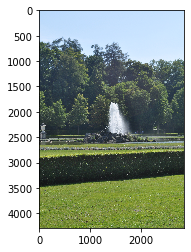

In [11]:
image = cv2.cvtColor(cv2.imread('DSC_0621.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(image)

([array([ 88.73956364, 102.82407273,  88.75232727]),
  array([200.43609023, 225.65125449, 252.26879699]),
  array([128.34624294, 148.55225224,  64.72748179]),
  array([35.52695975, 43.98233581, 42.43993644]),
  array([54.43466199, 66.79438604, 70.5500438 ]),
  array([138.59007002, 153.24024734, 147.27552969])],
 {0: 27443, 1: 48942, 2: 59985, 3: 37848, 4: 54807, 5: 10975})

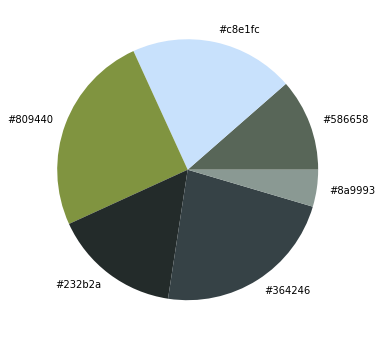

In [12]:
extrae_colores('DSC_0621.jpg', 6, True)

In [13]:
color_mayoritario('DSC_0621.jpg',colores,60,6)

'OLIVEDRAB'

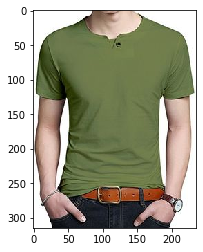

In [14]:
image = cv2.cvtColor(cv2.imread('pruebas3.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(image)

([array([109.53594405, 119.66041998,  75.66659137]),
  array([219.77478066, 190.05068353, 178.57322995]),
  array([175.32996271, 143.13575175, 130.91436516]),
  array([89.04970658, 82.10318293, 47.43080331]),
  array([33.46220627, 35.85212238, 27.8424809 ]),
  array([253.3374205 , 253.36700585, 252.00674129])],
 {0: 110654, 1: 24525, 2: 15809, 3: 25732, 4: 23967, 5: 39313})

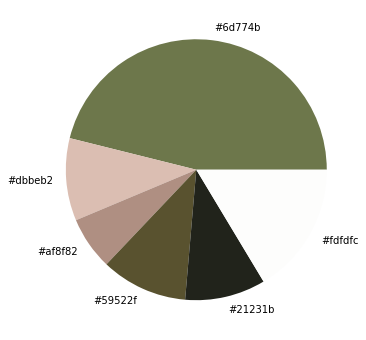

In [15]:
extrae_colores('pruebas3.jpg', 6, True)

In [16]:
colores_mayoritarios('pruebas3.jpg',colores,60,6)

{'DARKOLIVEGREEN': 110626,
 'BLACK': 23972,
 'WHITE': 39312,
 'MISTYROSE': 24509,
 'DARK YELLOW4': 25756,
 'ROSYBROWN': 15825}

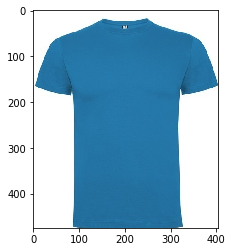

In [17]:
image = cv2.cvtColor(cv2.imread('pruebas1.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(image)

([array([ 36.70646395, 118.32170691, 167.25872256]),
  array([254.13488579, 254.83363788, 254.75727019]),
  array([114.4      , 159.3      , 181.5257732]),
  array([ 35.06478357, 111.89762708, 158.58775081]),
  array([183.66528583, 218.11019056, 230.92543496]),
  array([ 33.33972125,  92.54297329, 128.86469222])],
 {0: 91229, 1: 89748, 2: 973, 3: 55122, 4: 1206, 5: 1722})

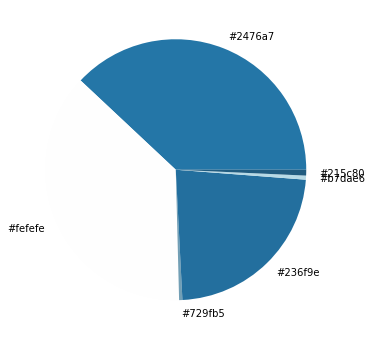

In [18]:
extrae_colores('pruebas1.jpg', 6, True)

In [19]:
colores_mayoritarios('pruebas1.jpg',colores,60,6)

{'LIGHTBLUE': 1201,
 'STEELBLUE': 146237,
 'ROYALBLUE': 1840,
 'LIGHTSLATEGRAY / LIGHTSLATEGREY': 977,
 'WHITE': 89745}

In [20]:
color_mayoritario('pruebas1.jpg',colores,60,2)

'STEELBLUE'

In [21]:
color_mayoritario('pruebas3.jpg',colores,60,2)

'DARKOLIVEGREEN'

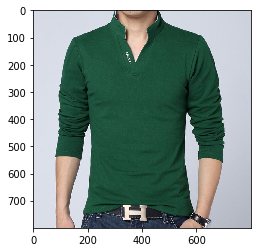

In [22]:
image = cv2.cvtColor(cv2.imread('pruebas4.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [23]:
color_mayoritario('pruebas3.jpg',colores,60,4)

'DARKOLIVEGREEN'

([array([192.41389856, 195.61277877, 205.48908441]),
  array([29.77977532, 77.08705777, 57.88452223]),
  array([214.33333333, 218.07013237, 228.45407791]),
  array([134.76915632, 115.13615099, 103.25955799]),
  array([204.1129817 , 168.32658893, 147.39910418]),
  array([19.34404672, 47.26791866, 36.55339887])],
 {0: 21253, 1: 107336, 2: 68442, 3: 6203, 4: 12939, 5: 23827})

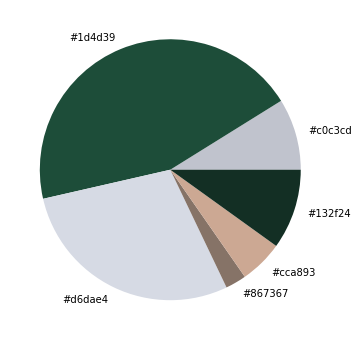

In [24]:
extrae_colores('pruebas4.jpg', 6, True)